*Project:* Analyzing Customer Purchasing Behavior

*Dataset:* https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

*Objective:*

1. Purchase Frquency: How often do Customers purchase from the business?
2. Average Order Value: what is the average amount spent by a customer in a single transaction?
3. Purchase history: What item have customers purchased and total cost?
4. Product Affinity: Which item are often bought together?
7. Payment Method: What payment method do customers prefer?
8. Seasonal trends: Are ther certain times of the year when customers are more likely to make purchases?
9. Demographic Analysis: How do customers purchases relate to demographic factors like age, gender, or location?
10. Analyze customers  that are Young adults, Frequent Buyers, Bargain seekers, High Value, loyal .
11. Identify top-items purchased and categories.
12. Impact of promotions on Purchase

In [1]:
import pandas as pd

In [4]:
df = pd\
.read_csv(r"C:\Users\HP\Documents\shopping_trends_updated.csv")

In [97]:
pd.set_option('display.max.rows', 100)
pd.set_option('display.max.columns', 30)

In [6]:
df.shape

(3900, 18)

In [7]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Correlation

In [12]:
df_corr = df[['Customer ID','Purchase Amount (USD)',\
           'Review Rating','Previous Purchases']]

In [13]:
df_corr.corr()

,Customer ID,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,0.011048,0.001343,-0.039159
Purchase Amount (USD),0.011048,1.000000,0.030776,0.008063
Review Rating,0.001343,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.008063,0.004229,1.000000


# Purchase Frquency pf

### How often do Customers purchase from the business and total amount?

In [14]:
df['total_purchase'] = df[['Purchase Amount (USD)',\
                           'Previous Purchases']]\
.sum(axis = 1, skipna = True)

### Purchase per frequency pf

In [15]:
pf = df\
.groupby('Frequency of Purchases')['total_purchase']\
.sum().sort_values( ascending = False, ignore_index = False)
pf

Frequency of Purchases
Every 3 Months    49665
Quarterly         48890
Annually          48468
Monthly           46789
Bi-Weekly         46759
Fortnightly       45704
Weekly            45677
Name: total_purchase, dtype: int64

In [16]:
import matplotlib.pyplot as plt

In [17]:
plt.style.available
plt.style.use('classic')

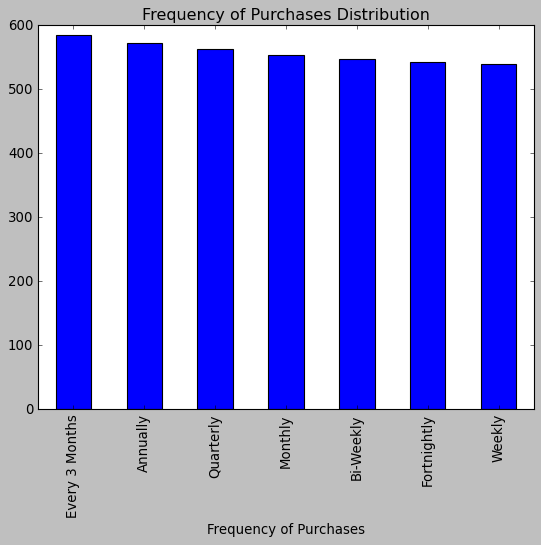

In [18]:
df['Frequency of Purchases']\
.value_counts().plot.bar()
plt.title('Frequency of Purchases Distribution')
plt.show()

# Average Order Value (aov)

### what is the average amount spent by a customer in a single transaction?

In [19]:
df["Average_Order_Value"] = df\
.groupby('Customer ID')['Purchase Amount (USD)']\
.transform('mean')

# Purchase history

### What item have customers purchased and total cost?

#### Total item Purchased and Amount (tipaa)

In [20]:
df_tipaa = df\
.groupby('Item Purchased')['total_purchase']\
.sum().sort_values(ascending = False).head(5)
df_tipaa

Item Purchased
Blouse     14973
Jewelry    14953
Dress      14727
Shirt      14670
Pants      14392
Name: total_purchase, dtype: int64

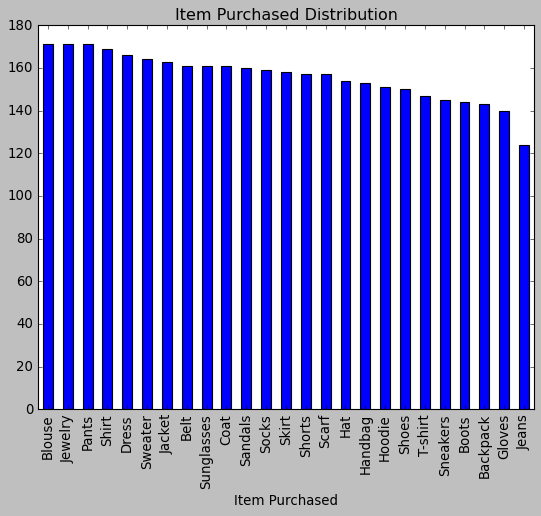

In [21]:
df['Item Purchased']\
.value_counts().plot.bar()
plt.title('Item Purchased Distribution')
plt.show()

# Product Affinity

### Which item are often bought together?

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import pairwise_distances

In [23]:
df_encoded = pd.get_dummies(df)

In [24]:
encoder = OneHotEncoder(categories='auto',
    drop=None,
    sparse = 'deprecated',
    sparse_output=True,
    handle_unknown='error',
    min_frequency=None,
    max_categories=None,)
df_encoder = encoder\
.fit_transform(df_encoded)

* Jaccard similarity matrix (j_sim)

In [26]:
j_sim = 1 - pairwise_distances(df_encoder, metric ='euclidean')

* General Product Affinity (p_affs)

In [27]:
p_affs = pd\
.DataFrame(j_sim, columns = df['Item Purchased'],\
           index = df['Item Purchased'] )\
.head(10)
p_affs

Item Purchased,Blouse,Sweater,Jeans,Sandals,Blouse,Sneakers,Shirt,Shorts,Coat,Handbag,...,Shirt,Dress,Jewelry,Hat,Skirt,Hoodie,Backpack,Belt,Shoes,Handbag
Item Purchased,,,,,,,,,,,,,,,,,,,,,
Blouse,1.000000,-4.291503,-5.633250,-6.071068,-5.480741,-5.633250,-5.480741,-5.164414,-5.164414,-6.071068,...,-6.615773,-6.348469,-6.615773,-6.874008,-6.615773,-6.348469,-6.874008,-6.615773,-6.615773,-6.745967
Sweater,-4.291503,1.000000,-5.324555,-5.782330,-5.782330,-6.071068,-5.480741,-5.164414,-5.480741,-5.782330,...,-6.615773,-6.348469,-6.615773,-6.615773,-6.615773,-6.615773,-6.874008,-6.874008,-6.874008,-7.000000
Jeans,-5.633250,-5.324555,1.000000,-5.164414,-5.164414,-5.782330,-5.480741,-4.830952,-6.071068,-5.782330,...,-6.874008,-6.615773,-7.124038,-6.874008,-6.348469,-6.615773,-6.874008,-6.874008,-6.615773,-6.745967
Sandals,-6.071068,-5.782330,-5.164414,1.000000,-5.164414,-5.164414,-5.633250,-5.782330,-6.071068,-5.480741,...,-7.124038,-7.124038,-6.745967,-7.000000,-6.874008,-6.874008,-6.874008,-6.874008,-6.615773,-6.615773
Blouse,-5.480741,-5.782330,-5.164414,-5.164414,1.000000,-5.782330,-5.164414,-5.480741,-5.782330,-5.480741,...,-6.615773,-6.615773,-6.874008,-7.124038,-6.615773,-6.615773,-6.615773,-6.874008,-7.124038,-6.615773
Sneakers,-5.633250,-6.071068,-5.782330,-5.164414,-5.782330,1.000000,-5.782330,-5.782330,-5.480741,-5.782330,...,-6.874008,-7.124038,-6.615773,-6.874008,-6.874008,-6.348469,-6.874008,-6.348469,-6.071068,-6.615773
Shirt,-5.480741,-5.480741,-5.480741,-5.633250,-5.164414,-5.782330,1.000000,-5.324555,-6.071068,-5.164414,...,-6.615773,-6.348469,-7.124038,-6.874008,-6.874008,-6.874008,-7.124038,-6.874008,-7.124038,-6.615773
Shorts,-5.164414,-5.164414,-4.830952,-5.782330,-5.480741,-5.782330,-5.324555,1.000000,-5.782330,-6.071068,...,-6.615773,-6.071068,-6.874008,-6.874008,-6.348469,-6.348469,-6.874008,-6.874008,-6.874008,-7.124038
Coat,-5.164414,-5.480741,-6.071068,-6.071068,-5.782330,-5.480741,-6.071068,-5.782330,1.000000,-6.071068,...,-6.745967,-6.874008,-6.615773,-6.874008,-6.874008,-6.348469,-6.874008,-6.615773,-6.348469,-6.874008


# Payment Method

### What payment method do customers prefer?

In [28]:
df_pm = df\
.groupby(df['Payment Method'])['Customer ID']\
.count()
df_pm

Payment Method
Bank Transfer    612
Cash             670
Credit Card      671
Debit Card       636
PayPal           677
Venmo            634
Name: Customer ID, dtype: int64

#### Top 3 Payment Methods

In [29]:
df_pm.nlargest(3)

Payment Method
PayPal         677
Credit Card    671
Cash           670
Name: Customer ID, dtype: int64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

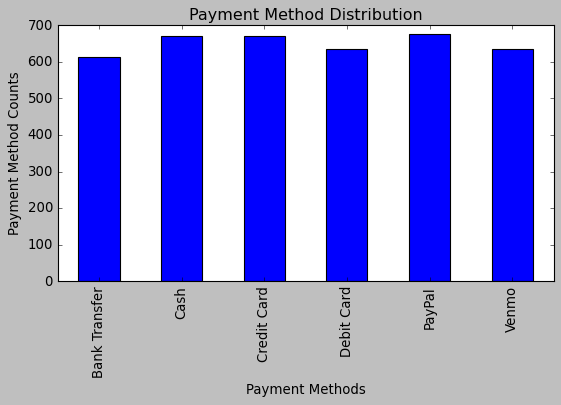

In [31]:
plt.figure(figsize = (8,4))
df_pm.plot(kind ='bar')
plt.xlabel('Payment Methods')
plt.ylabel('Payment Method Counts')
plt.title('Payment Method Distribution')
plt.show()

# Seasonal trends

### Are there certain times of the year when customers are more likely to make purchases?

In [32]:
df_st = df\
.groupby(['Season'])['total_purchase']\
.sum().sort_values(ascending = False)
df_st

Season
Fall      84364
Winter    83776
Spring    83770
Summer    80042
Name: total_purchase, dtype: int64

#### Yes, there are certain times.

In [33]:
df_st.nlargest(2)

Season
Fall      84364
Winter    83776
Name: total_purchase, dtype: int64

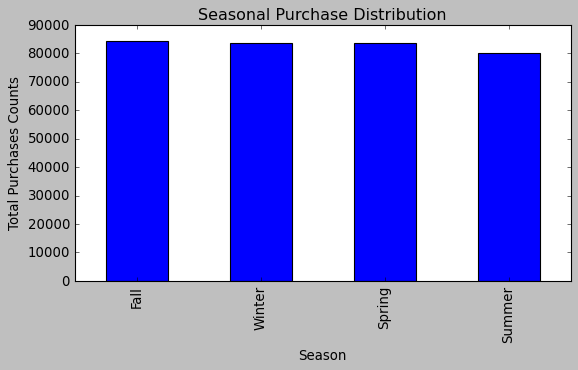

In [34]:
plt.figure(figsize = (8,4))
df_st.plot(kind ='bar')
plt.xlabel('Season')
plt.ylabel('Total Purchases Counts')
plt.title('Seasonal Purchase Distribution')
plt.show()

# Demographic Analysis

### How do customers purchases relate to demographic factors like age, gender, or location?

#### Number of customers per Age Groups

In [35]:
df['Age_Group'] = pd.cut(df['Age'],\
                         bins = [18, 30, 40, 50, 60,70])

df['Age_Group'].value_counts()

Age_Group
(18, 30]    880
(50, 60]    753
(40, 50]    750
(30, 40]    725
(60, 70]    723
Name: count, dtype: int64

#### Customer Purchase by Age Group

In [36]:
Age_group_purchase = df.groupby('Age_Group',\
                                observed = True)['total_purchase']\
.sum().sort_values(ascending = False)
Age_group_purchase

Age_Group
(18, 30]    75240
(50, 60]    65251
(40, 50]    62540
(60, 70]    62002
(30, 40]    61329
Name: total_purchase, dtype: int64

#### Customer Purchase by Age

In [37]:
Age_group_purchase = df.groupby('Age', observed = True)['total_purchase'].sum()
Age_group_purchase.sort_values(ascending = False).head(3)

Age
69    7792
49    7789
57    7694
Name: total_purchase, dtype: int64

#### Customer Purchase by Gender

In [38]:
gender_purchase = df.groupby('Gender')['total_purchase'].sum()
gender_purchase.sort_values(ascending = False)

Gender
Male      226065
Female    105887
Name: total_purchase, dtype: int64

#### Customer Purchase by Location

In [39]:
location_purchase = df.groupby('Location')['total_purchase'].sum()
location_purchase.sort_values(ascending = False).head(5)

Location
Montana       8210
Illinois      8064
California    7932
Idaho         7838
Nevada        7779
Name: total_purchase, dtype: int64

# Analyze customers by the following:

### Loyal Customers,Frequent Customers, High Value Customers.

In [40]:
from sklearn.cluster import KMeans 

In [67]:
kmeans = KMeans(n_clusters=3, n_init = 'auto')
kmeans.fit_predict(df_encoded)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
df['Cluster'] = labels

In [70]:
centroids.shape

(3, 146)

In [73]:
df.groupby(df['Cluster']).describe().transpose().tail(1)

,Cluster,0,1,2
Average_Order_Value,max,100.0,100.0,100.0


In [108]:
df = df.drop(columns = ['Segments','purchase_seg','Cluster','pd_seg'])

In [72]:
cluster_mapping = {
    0:'Loyal Customers',
    1:'Frequent Customers',
    2:'High Value Customers'
}

In [101]:
df['Categorical Segments'] = df['Cluster'].map(cluster_mapping)

In [285]:
from sklearn.decomposition import PCA

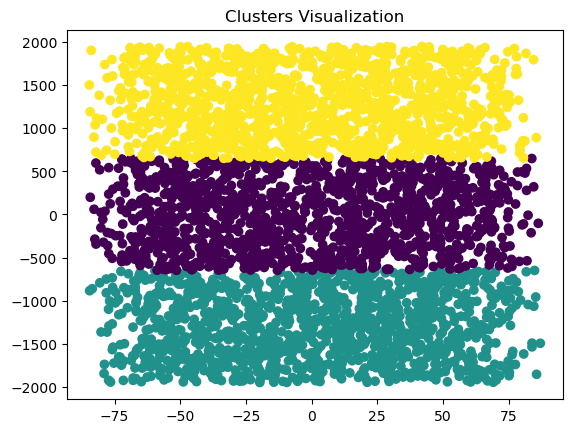

In [286]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_encoded)
plt.scatter(reduced_data[:,1], reduced_data[:,0], c = labels )
plt.title('Clusters Visualization')
plt.show()

### Low Purchase, Medium Purchase, High Purchase, Premium Purchase.

In [103]:
df['Purchase Segments'] = pd.qcut(df['total_purchase'], 4, labels = ['Low Purchase',\
                                                                'Medium Purchase',\
                                                                'High Purchase',\
                                                                'Premium Purchase'])

In [104]:
df.groupby('Purchase Segments', observed=True)['Customer ID'].count()

Purchase Segments
Low Purchase        1018
Medium Purchase      969
High Purchase        980
Premium Purchase     933
Name: Customer ID, dtype: int64

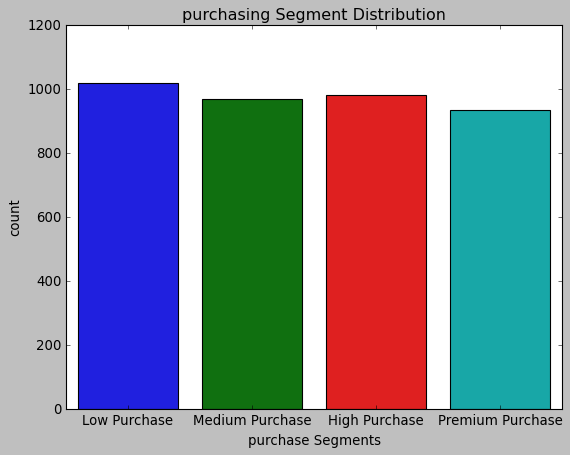

In [95]:
sns.countplot(x = 'purchase_seg', data = df)
plt.xlabel('purchase Segments')
plt.title('purchasing Segment Distribution')
plt.show( )

# Top-items purchased and categories.

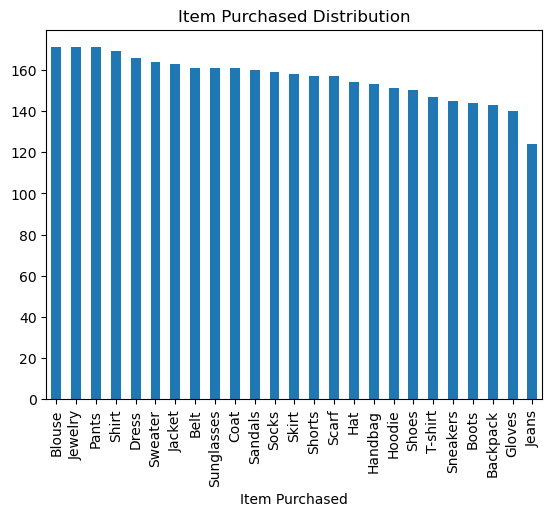

In [262]:
df['Item Purchased'].value_counts().plot.bar()
plt.title('Item Purchased Distribution')
plt.show()

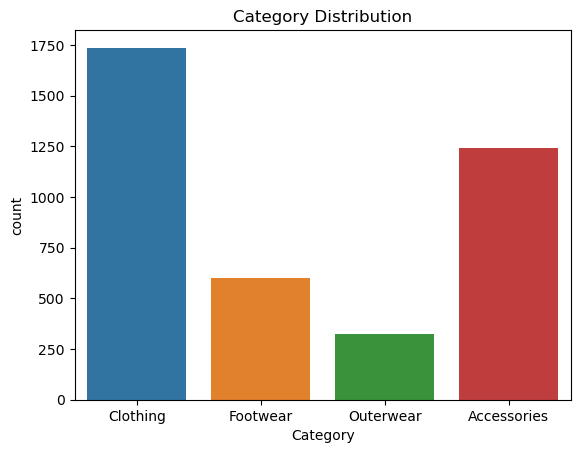

In [263]:
sns.countplot(x = 'Category', data = df)
plt.title('Category Distribution')
plt.show()

### Top Items Purchased (tip)

In [49]:
df_tip = df\
.groupby('Item Purchased')['total_purchase']\
.sum().sort_values( ascending = False , ignore_index = False)\
.head(1)
df_tip

Item Purchased
Blouse    14973
Name: total_purchase, dtype: int64

### Top Purchase by Category (tpc)

In [51]:
df_tpc = df.groupby('Category')['total_purchase']\
.sum().sort_values( ascending = False , ignore_index = False).head(1)
df_tpc

Category
Clothing    148035
Name: total_purchase, dtype: int64

# Impact of promotions on Purchase

In [267]:
df.groupby('Promo Code Used')['total_purchase'].sum()

Promo Code Used
No     189370
Yes    142582
Name: total_purchase, dtype: int64

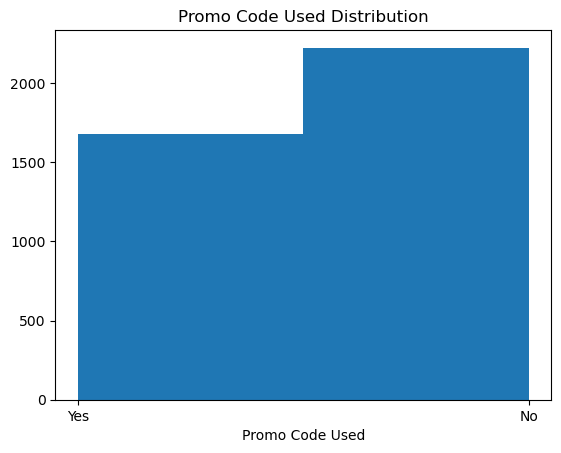

In [269]:
plt.hist(df['Promo Code Used'], bins = 2)
plt.title('Promo Code Used Distribution')
plt.xlabel('Promo Code Used')
plt.show()

#### Save to CSV

In [109]:
df.to_csv("Analysis of Customers Purchasing Behaviour.csv" , index = False)